# Install and import semantic-link library

In [1]:
pip install semantic-link

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 3, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 158.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 58.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 62.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 89.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 165.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sempy.fabric as fabric

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 4, Finished, Available)

# List workspaces
get an overview of workspaces with assigned Fabric Capacities

In [ ]:
display(spark.createDataFrame(fabric.list_workspaces()).filter("`Is On Dedicated Capacity` = True"))

# List datasets

In [4]:
workspace = "MyFabric Workshop" #use name or GUID
fabric.list_datasets(workspace)

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 6, Finished, Available)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,wwilakehouse_bronze,3f264fba-739f-4a88-ab18-dc1e3e6fbae8,2021-02-12 23:00:58,NaT
1,DataflowsStagingLakehouse,854239e1-96ae-4ece-9326-4df2cffe7f00,2021-02-12 23:00:58,NaT
2,DataflowsStagingWarehouse,38ebeb78-fecb-4154-93ca-086c6d2e35b2,2021-02-12 23:00:58,NaT
3,wwilakehouse_silver,31c8f493-88c9-4baa-9f31-7c0dde31be6a,2021-02-12 23:00:58,NaT
4,wwilakehouse_gold,144d06f4-bf83-40ac-ba17-779b45a88c40,2021-02-12 23:00:58,NaT
5,wwi-model,25e6477a-fc6f-47dc-8aa4-9f7d5db17398,2021-02-12 23:00:58,NaT


# Explore semantic model wwilakehouse_gold

In [5]:
dataset = "wwi-model"

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 7, Finished, Available)

In [6]:
fabric.list_tables(dataset) #, include_columns=True

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 8, Finished, Available)

,Name,Description,Hidden,Data Category,Type
0,v_dimension_city,,False,,Table
1,v_dimension_customer,,False,,Table
2,v_dimension_date,,False,,Table
3,v_dimension_employee,,False,,Table
4,v_dimension_stock_item,,False,,Table
5,v_fact_sales,,False,,Table


# Visualize Keys & Relationships

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 9, Finished, Available)

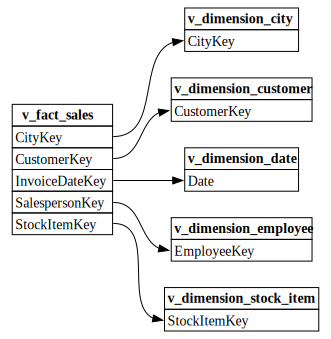

In [7]:
from sempy.relationships import plot_relationship_metadata

plot_relationship_metadata(fabric.list_relationships(dataset))

# List measures from semantic model wwilakehouse_gold

In [8]:
fabric.list_measures(dataset)

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 10, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description
0,v_fact_sales,SumProfit,Calculate(Sum(v_fact_sales[Profit])),Double,False,Measures,
1,v_fact_sales,SumProfitLY,"Calculate([SumProfit],SAMEPERIODLASTYEAR(v_dim...",Double,False,Measures,
2,v_fact_sales,YoYProfit,[SumProfit]/[SumProfitLY]-1,Double,False,Measures,


In [9]:
fabric.read_table(dataset, "v_dimension_city", 100)

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 11, Finished, Available)

,v_dimension_city[CityKey],v_dimension_city[WWICityID],v_dimension_city[City],v_dimension_city[StateProvince],v_dimension_city[Country],v_dimension_city[Continent],v_dimension_city[SalesTerritory],v_dimension_city[Region],v_dimension_city[Subregion],v_dimension_city[Location],v_dimension_city[LatestRecordedPopulation],v_dimension_city[ValidFrom],v_dimension_city[ValidTo],v_dimension_city[LineageKey]
0,82085,37232,Williams Creek,Indiana,United States,North America,Great Lakes,Americas,Northern America,POINT (-86.1502659 39.8997622),423,2013-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
1,90931,25393,Olney,Illinois,United States,North America,Great Lakes,Americas,Northern America,POINT (-88.0853155 38.7308811),9115,2013-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
2,90932,25406,Olympia Fields,Illinois,United States,North America,Great Lakes,Americas,Northern America,POINT (-87.6742119 41.513368),4988,2013-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
3,90933,25417,Omaha,Illinois,United States,North America,Great Lakes,Americas,Northern America,POINT (-88.3030977 37.8903243),266,2013-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
4,90934,25435,Onarga,Illinois,United States,North America,Great Lakes,Americas,Northern America,POINT (-88.0061509 40.715035),1368,2013-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116290,103285,2387,Beirne,Arkansas,United States,North America,Southeast,Americas,Northern America,POINT (-93.2040588 33.8887161),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
116291,103286,2411,Belfast,Arkansas,United States,North America,Southeast,Americas,Northern America,POINT (-92.4590455 34.4145393),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
116292,101373,37043,Whitehall,Arkansas,United States,North America,Southeast,Americas,Northern America,POINT (-90.7356678 35.4803601),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
116293,101375,37145,Wideman,Arkansas,United States,North America,Southeast,Americas,Northern America,POINT (-92.0087625 36.1864568),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1


# Evaluate Measure

In [10]:
fabric.evaluate_measure(dataset, "SumProfit")

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 12, Finished, Available)

,SumProfit
0,17980267019.75


In [11]:
fabric.evaluate_measure(
    dataset,
   ["SumProfit","SumProfitLY"],
   ["'v_dimension_date'[FiscalYearLabel]"]
) 

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 13, Finished, Available)

,FiscalYearLabel,SumProfit,SumProfitLY
0,FY2000,16359056584.450001,<NA>
1,FY2001,1621210435.3,16359056584.449999
2,FY2002,<NA>,1621210435.3


# Testing measures with unittest

In [12]:
import unittest

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 14, Finished, Available)

In [13]:
class TestMeasures(unittest.TestCase):
    
    def test_total_profit(self):
        expected = spark.sql("SELECT sum(profit) FROM wwilakehouse_bronze.fact_sale").collect()[0][0]
        result = fabric.evaluate_measure("wwi-model","SumProfit")["SumProfit"][0]
        
        msg = f"expected {expected}\n, result {result}"
        self.assertEqual(expected, result, msg)


StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 15, Finished, Available)

In [14]:
unittest.main(argv=[''], verbosity=2, exit=False)

StatementMeta(, 9abcaf1e-4b43-4b7a-b12d-62619a580cb7, 16, Finished, Available)

test_total_profit (__main__.TestMeasures) ... /home/trusted-service-user/cluster-env/trident_env/lib/python3.10/socket.py:776: ResourceWarning: unclosed <socket.socket fd=212, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 56904), raddr=('127.0.0.1', 42857)>
  self._sock = None
ok

----------------------------------------------------------------------
Ran 1 test in 16.068s

OK
